In [23]:
import pandas as pd
import numpy as np
import seaborn as sns


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
mpl.rcParams['figure.figsize']=(20.0,10.0)
inline_rc = dict(mpl.rcParams)
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [73]:

import scipy

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [74]:

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building, if needed
from sklearn.linear_model import LogisticRegression

# For scaling the data using z-score
from scipy.stats import zscore

# to compute distances
from scipy.spatial.distance import cdist

# to compute distances
from scipy.spatial.distance import pdist  #Pairwise distribution between data points



In [25]:
import os
os.getcwd()

'C:\\Users\\Rituparna Basu\\Documents\\Datascience_Projects_Basu\\Log1_ND'

In [15]:
for f in os.listdir("C:\\Users\\Rituparna Basu\\Documents\\Datascience_Projects_Basu\\Log1_ND"):
    print(f)

.ipynb_checkpoints
38594-AIG2-CND2-CAL2-CMRI-BCS-FMI_RawLogsFmNDIC - Copy.csv
38594.csv
Log1_ND.ipynb


## Load data

In [26]:
df=pd.read_csv("38594.csv", index_col = "MD")

In [88]:
df.head()

AF10    AO10    AT90    DPHZ      GR   HCAL   HCGR    NPHI    RHOZ  \
MD                                                                             
4000.0  1.4413  1.4636  1.4090  0.1931  105.59  10.55  87.08  0.4042  2.3799   
4000.5  1.4410  1.4332  1.3876  0.1948  105.59  10.57  87.46  0.4125  2.3768   
4001.0  1.4401  1.4533  1.3734  0.1993  109.25  10.52  87.41  0.4374  2.3692   
4001.5  1.4419  1.4351  1.3552  0.2028  110.01  10.43  89.44  0.4165  2.3633   
4002.0  1.4538  1.3964  1.3390  0.2116  107.75  10.37  87.78  0.4389  2.3482   

          RXOZ     SP    TNPH   HTHO  HURA  PEFZ  
MD                                                
4000.0  2.2924  22.72  0.4263  15.86  3.18  3.35  
4000.5  2.2924  22.68  0.4374  15.74  3.23  3.35  
4001.0  1.1471  22.10  0.4427  15.54  3.42  3.33  
4001.5  2.2916  21.95  0.4721  15.28  3.44  3.30  
4002.0  2.2882  22.43  0.4530  14.71  3.64  3.33

In [89]:
df.tail()

AF10    AO10    AT90    DPHZ     GR  HCAL   HCGR    NPHI    RHOZ  \
MD                                                                           
6298.0  2.4658  2.3625  2.2366  0.0137  91.11  8.72  60.64  0.1664  2.6865   
6298.5  2.7876  3.7388  2.6435 -0.0173  90.61  8.71  57.40  0.1430  2.7395   
6299.0  3.2558  2.2960  2.8959 -0.0356  85.91  8.72  56.07  0.1275  2.7709   
6299.5  3.8534  3.0963  3.2075 -0.0520  88.01  8.78  52.51  0.1223  2.7990   
6300.0  4.4326  8.3009  4.6487 -0.0630  72.13  8.70  46.58  0.0886  2.8177   

             RXOZ     SP    TNPH  HTHO  HURA  PEFZ  
MD                                                  
6298.0  4384.7808  35.28  0.1716  5.33  3.71  4.04  
6298.5  4022.9946  34.89  0.1270  5.39  3.60  4.19  
6299.0  3438.4041  35.00  0.1196  5.58  3.65  4.29  
6299.5     0.9178  34.93  0.1072  5.13  3.94  4.31  
6300.0     0.9178  34.90  0.0965  4.84  3.40  4.33

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4601 entries, 4000.0 to 6300.0
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AF10    4601 non-null   float64
 1   AO10    4601 non-null   float64
 2   AT90    4601 non-null   float64
 3   DPHZ    4601 non-null   float64
 4   GR      4601 non-null   float64
 5   HCAL    4601 non-null   float64
 6   HCGR    4601 non-null   float64
 7   NPHI    4601 non-null   float64
 8   RHOZ    4601 non-null   float64
 9   RXOZ    4601 non-null   float64
 10  SP      4601 non-null   float64
 11  TNPH    4601 non-null   float64
 12  HTHO    4601 non-null   float64
 13  HURA    4601 non-null   float64
 14  PEFZ    4601 non-null   float64
dtypes: float64(15)
memory usage: 575.1 KB


In [28]:
df.shape

(4601, 15)

In [30]:
df.describe().T

count         mean          std      min      25%      50%        75%  \
AF10  4601.0    11.465628    53.233369   0.3930   1.6909   4.1272     8.3145   
AO10  4601.0    20.295575   118.412715   0.3098   1.7084   4.1007     8.7971   
AT90  4601.0    11.874115    77.056165   0.2454   1.4651   3.4249     6.7735   
DPHZ  4601.0     0.132349     0.097402  -0.1647   0.0649   0.1336     0.1912   
GR    4601.0    72.143360    42.043479   8.3200  42.9600  72.0000    92.6000   
HCAL  4601.0     9.005218     0.370841   8.6200   8.7900   8.9200     9.0400   
HCGR  4601.0    52.828544    26.137844   3.6800  29.2500  56.6100    74.7700   
NPHI  4601.0     0.228141     0.112073  -0.0096   0.1517   0.2278     0.3113   
RHOZ  4601.0     2.483683     0.166556   2.0757   2.3830   2.4815     2.5989   
RXOZ  4601.0  1023.062495  1569.012894   0.0596   1.5292   2.2938  2262.0505   
SP    4601.0    34.005384     8.556700  17.5000  27.3200  33.7100    38.6800   
TNPH  4601.0     0.227952     0.117830  -0.0256   0.1441   0.2198     0.3098   
HTHO  4601.0     7.758396     4.880403   0.2700   3.5500   7.3500    11.6100   
HURA  4601.0     2.919163     3.372945   0.2700   1.3400   2.1300     3.1800   
PEFZ  4601.0     3.430167     0.714268   1.9100   3.0800   3.3900     3.7700   

            max  
AF10  1746.9846  
AO10  1950.0000  
AT90  1950.0000  
DPHZ     0.3709  
GR     704.7300  
HCAL    10.5700  
HCGR   172.4600  
NPHI     0.5034  
RHOZ     2.9916  
RXOZ  5000.0371  
SP      62.3400  
TNPH     0.5615  
HTHO    21.0800  
HURA    67.7100  
PEFZ     6.0800

In [31]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

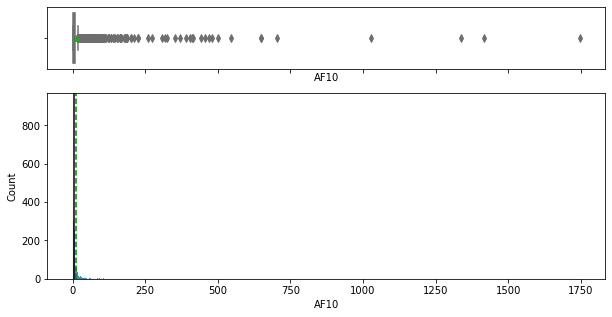

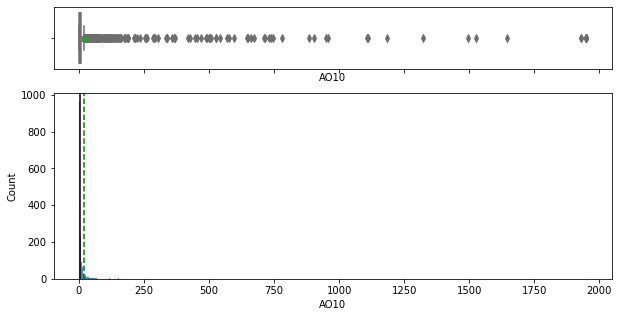

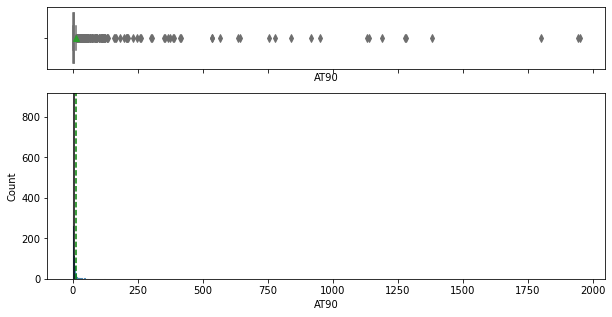

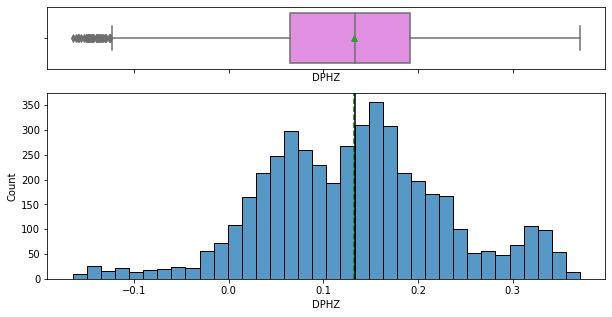

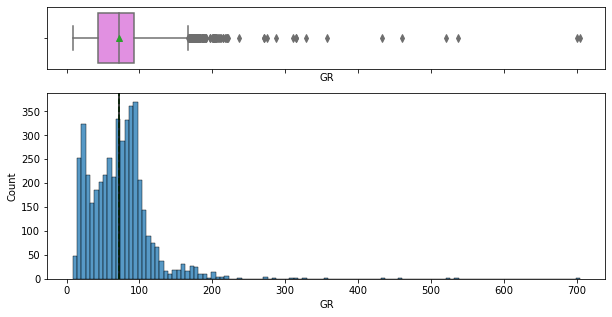

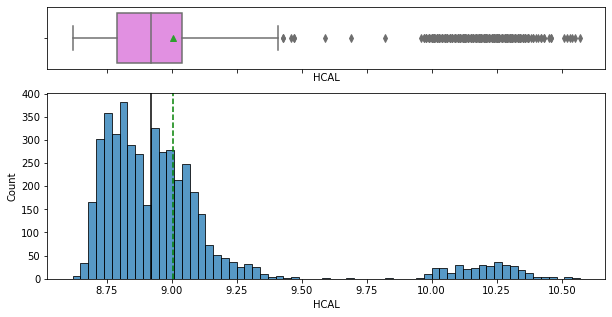

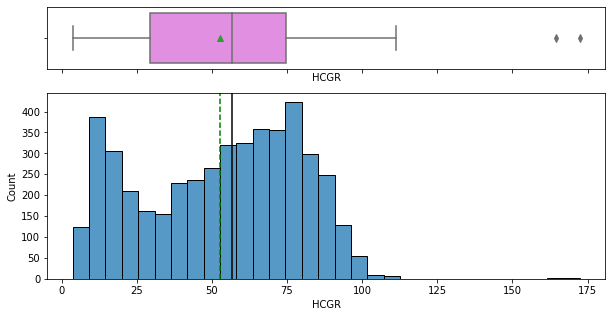

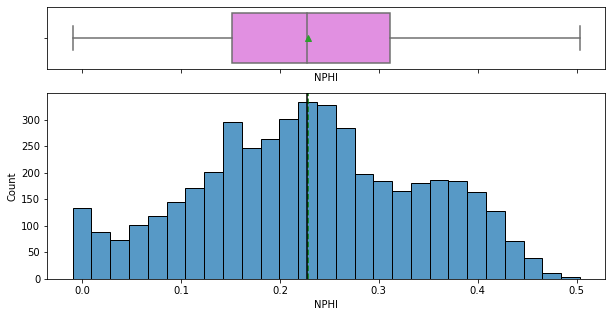

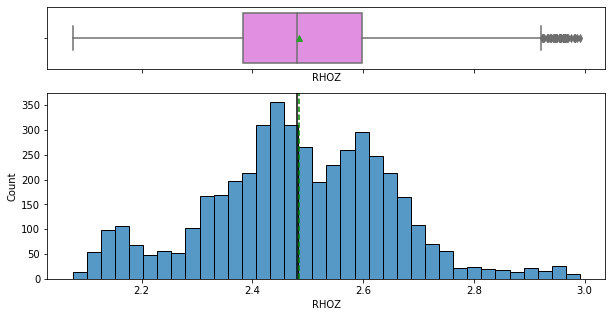

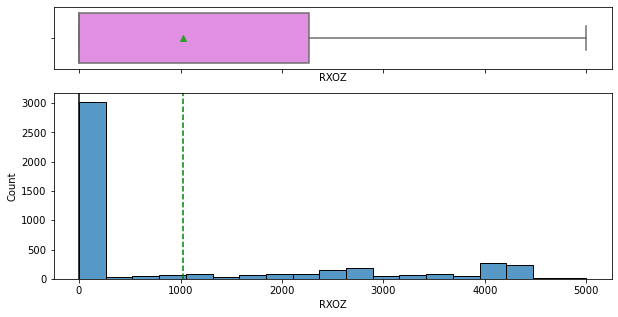

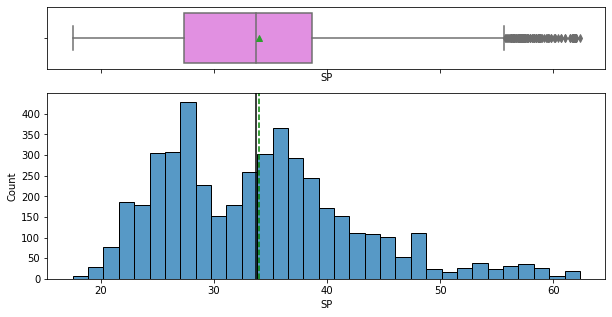

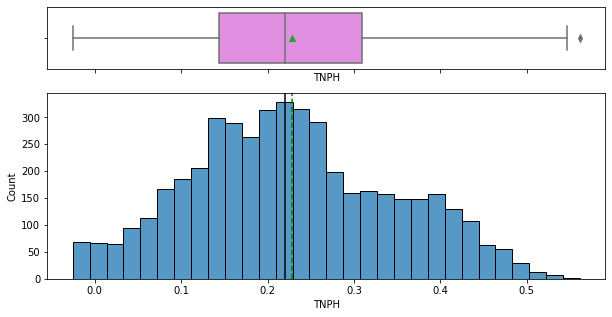

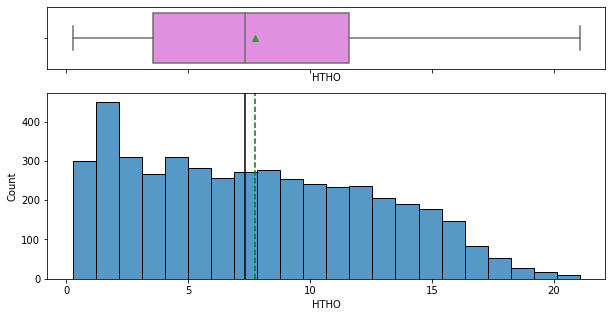

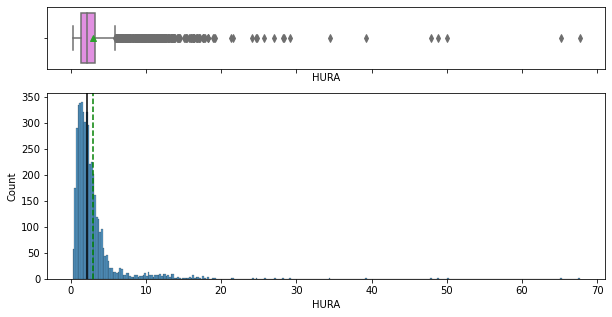

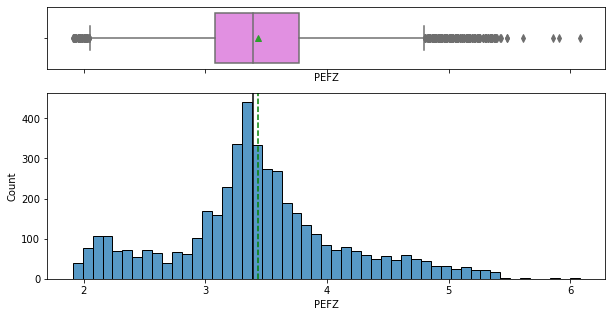

In [33]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(10, 5), kde=False, bins=None)

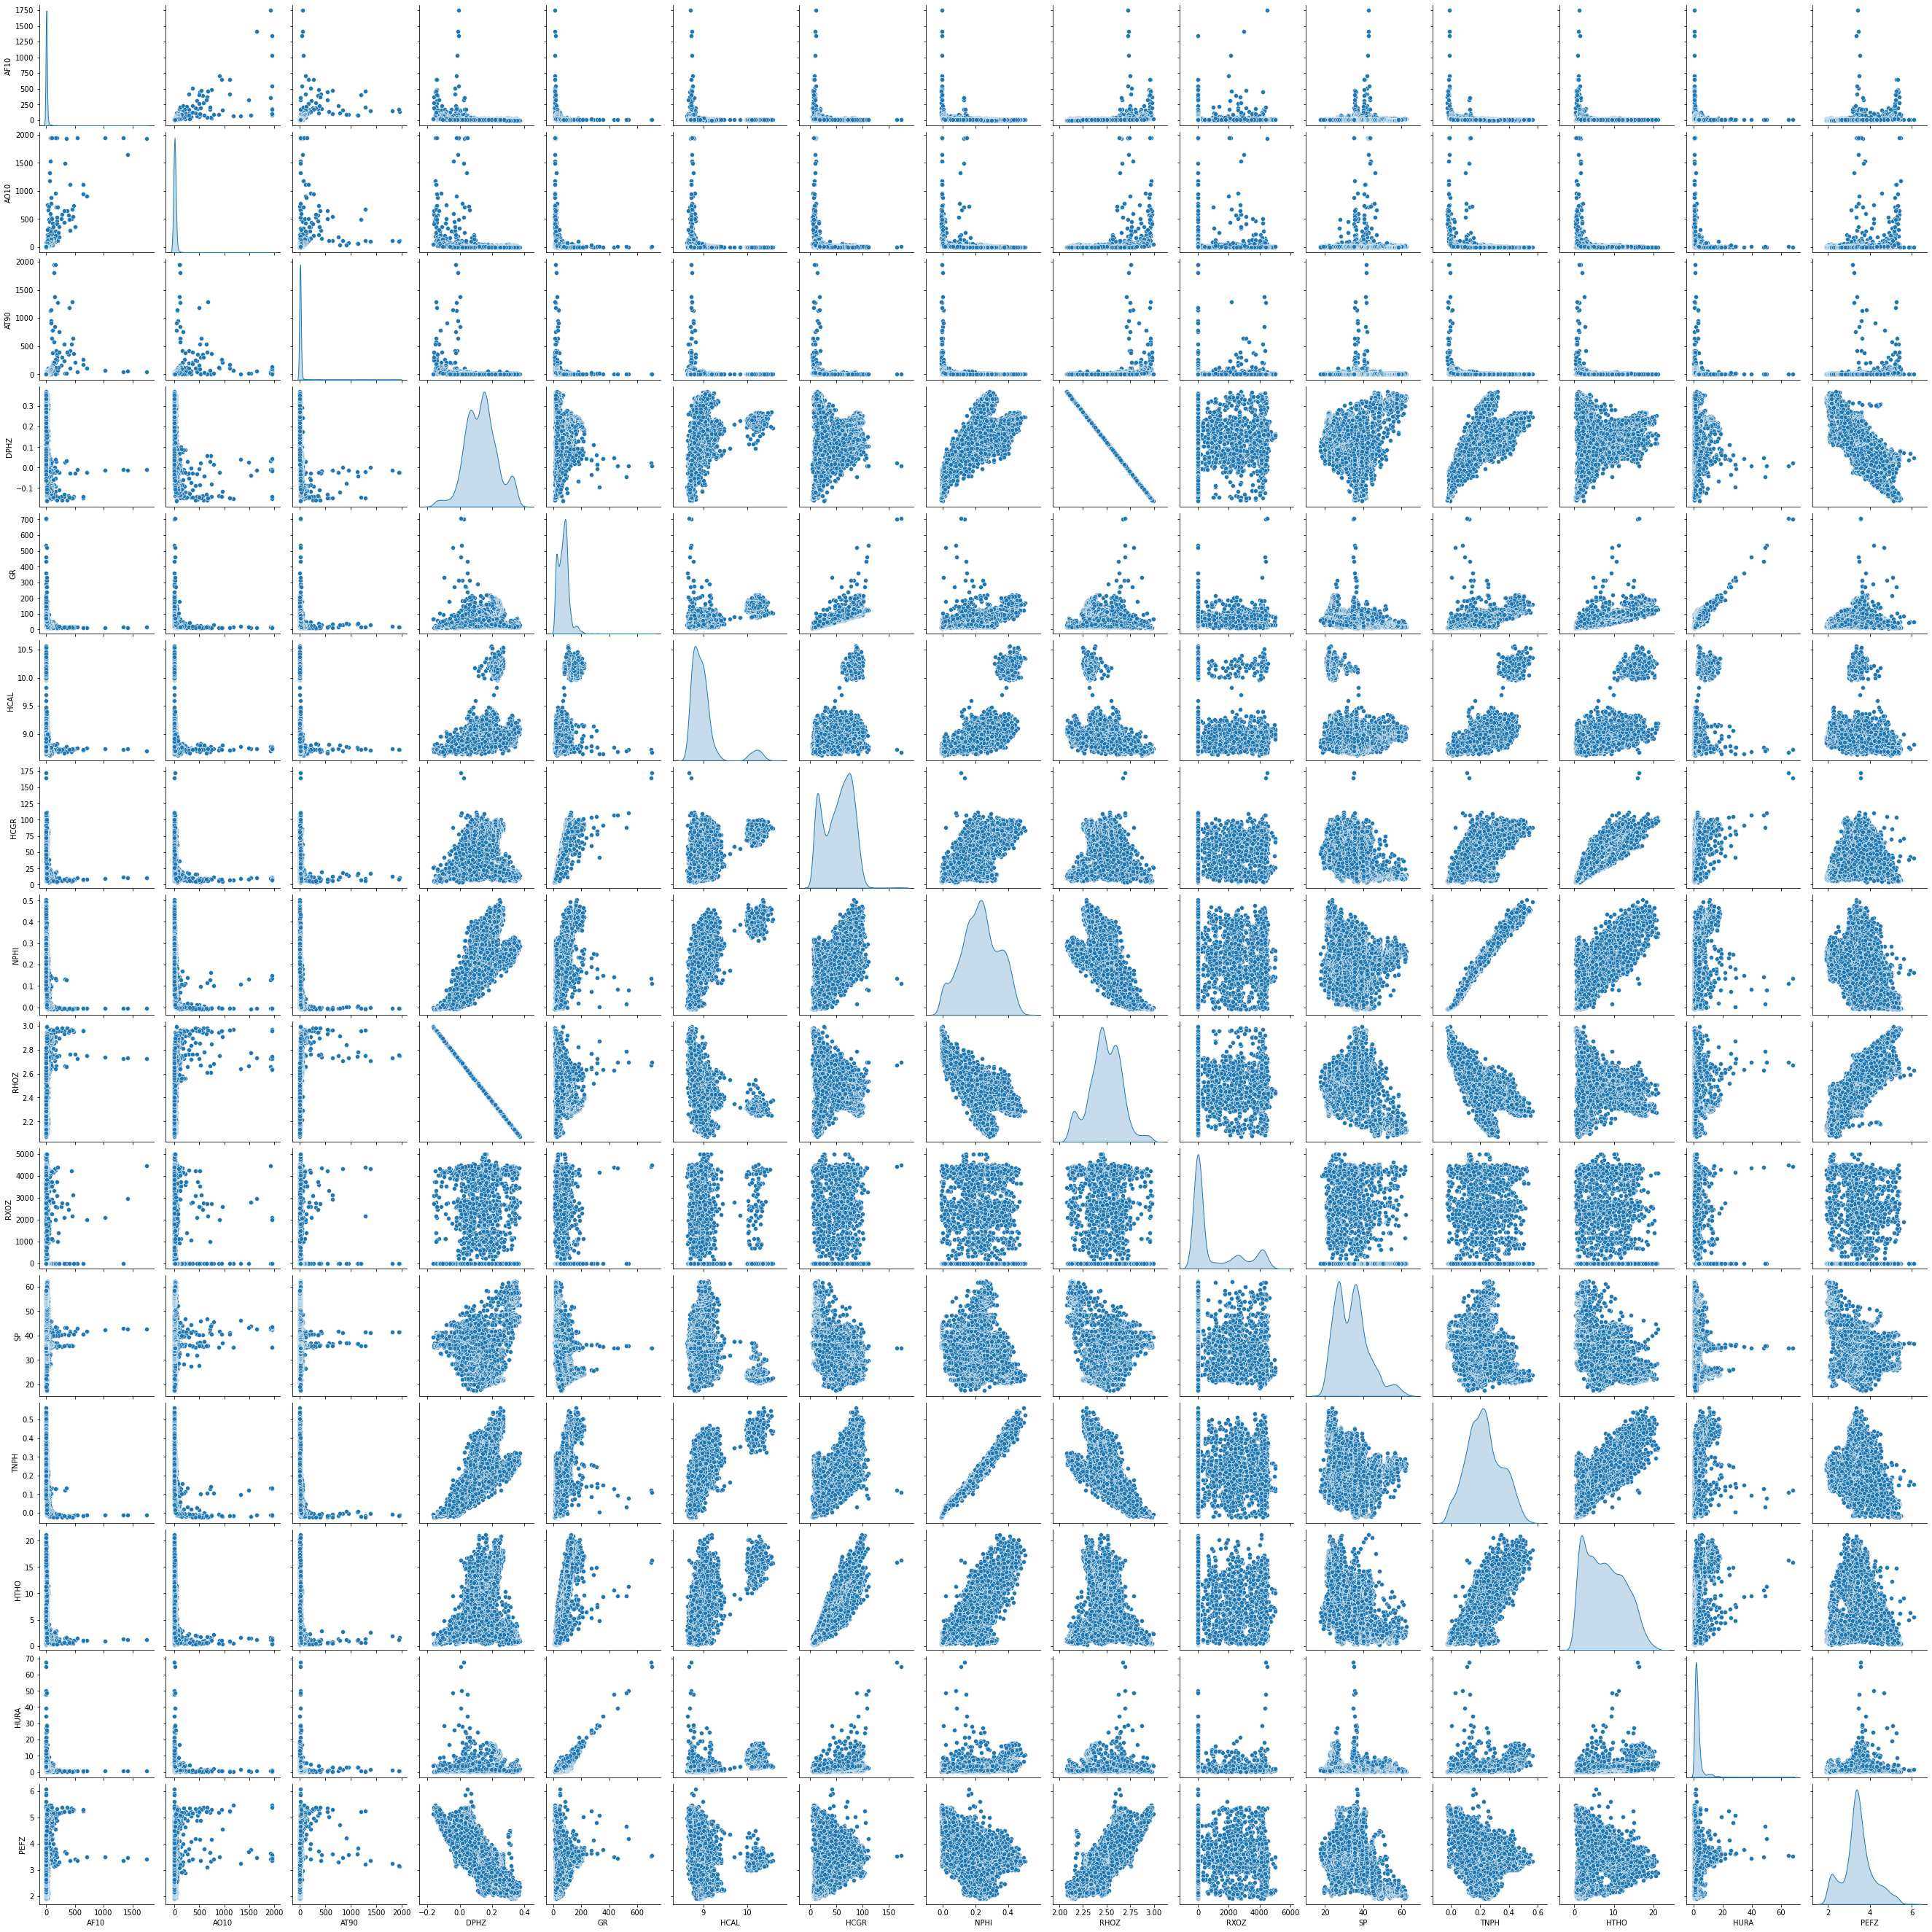

In [34]:
sns.pairplot(df,  diag_kind='kde')

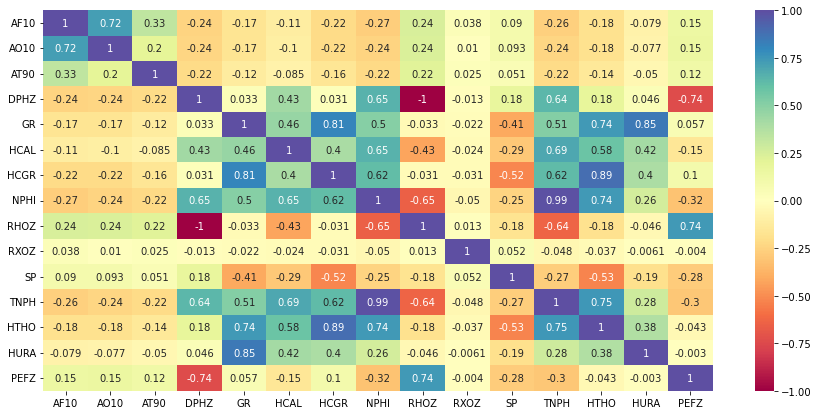

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

In [ ]:
# will drop GR, DPHZ, TNPH, HURA and HCAL

In [111]:
df1 = df.copy()

In [112]:
df1 = df1.drop(columns=['GR', 'DPHZ', 'TNPH','HURA', 'HCAL', 'AF10', 'AO10', 'AT90'])

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4601 entries, 4000.0 to 6300.0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HCGR    4601 non-null   float64
 1   NPHI    4601 non-null   float64
 2   RHOZ    4601 non-null   float64
 3   RXOZ    4601 non-null   float64
 4   SP      4601 non-null   float64
 5   HTHO    4601 non-null   float64
 6   PEFZ    4601 non-null   float64
dtypes: float64(7)
memory usage: 287.6 KB


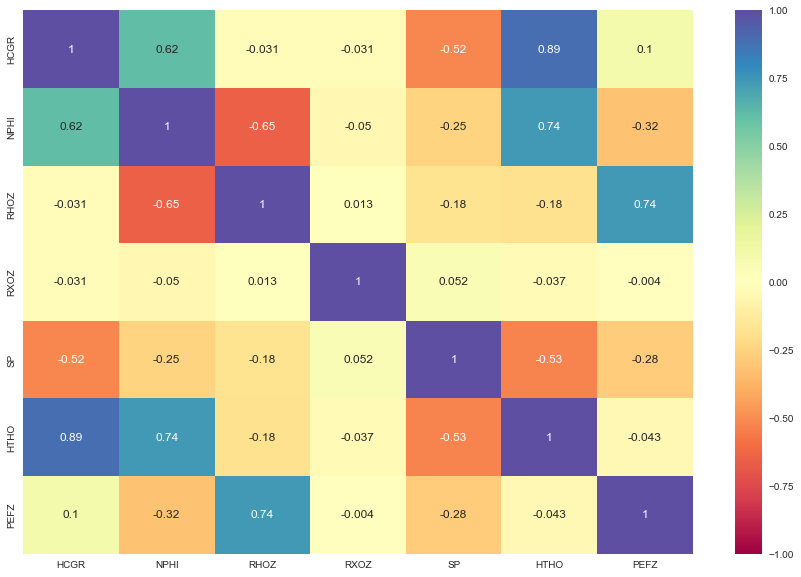

In [114]:
plt.figure(figsize=(15, 10))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

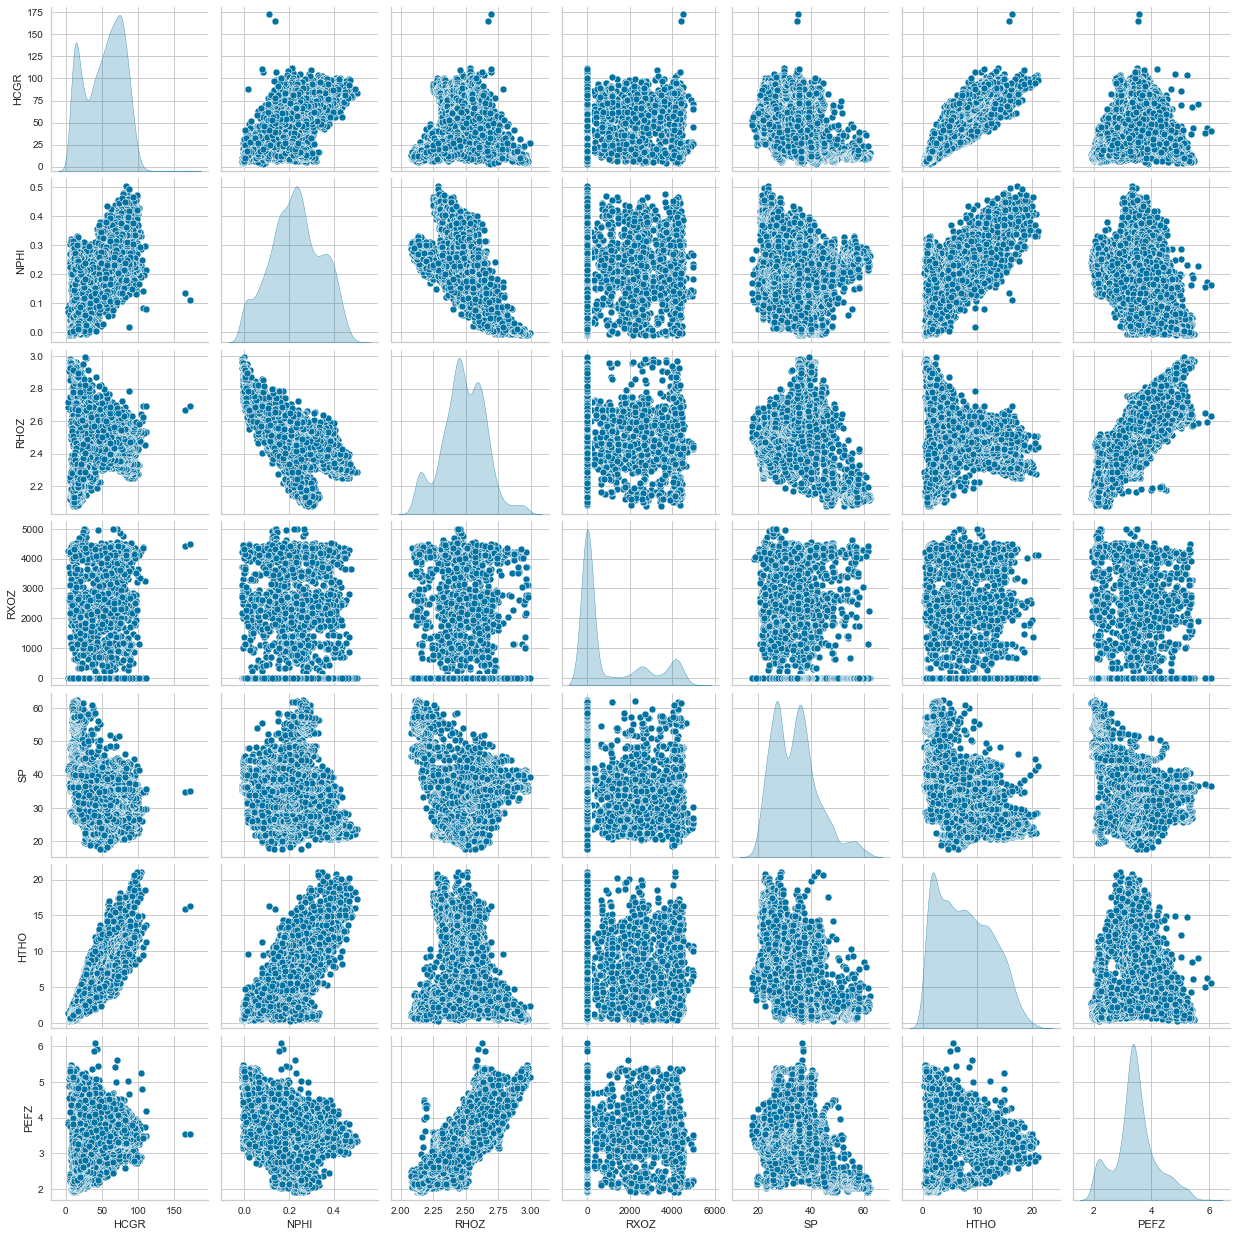

In [115]:
sns.pairplot(df1,  diag_kind='kde')

In [116]:
#Scaling
scaler=StandardScaler()
scaler.fit(df1)
df1_std = pd.DataFrame(scaler.transform(df1),columns= df1.columns )
print("All features are now scaled")

All features are now scaled


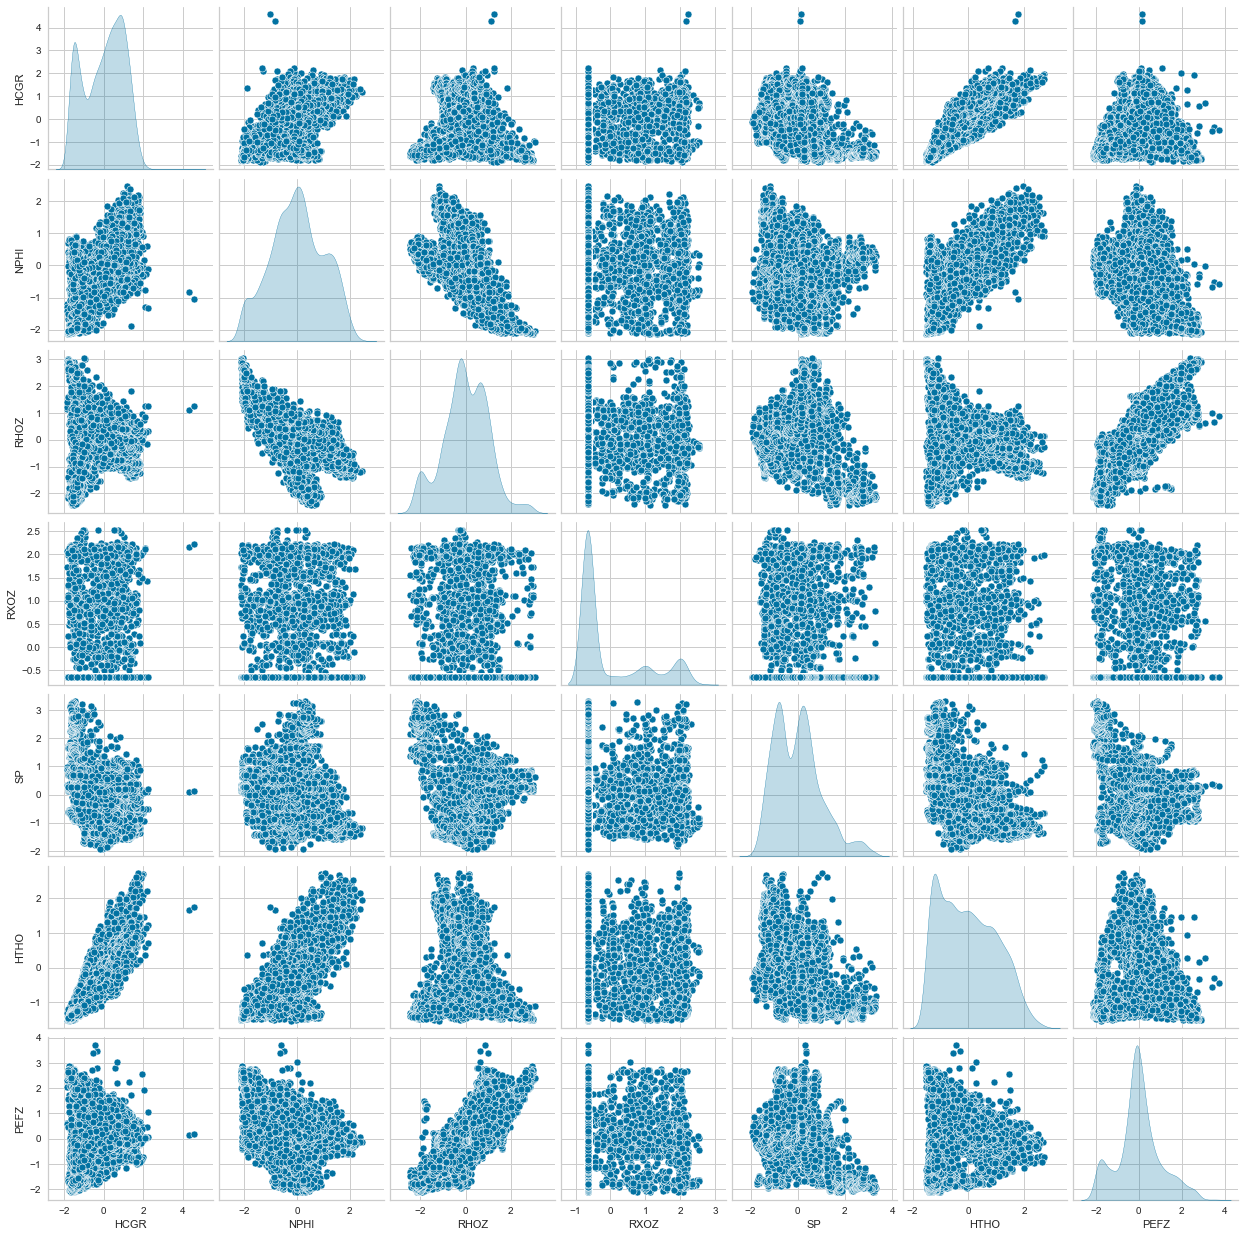

In [117]:
sns.pairplot(df1_std,  diag_kind='kde')

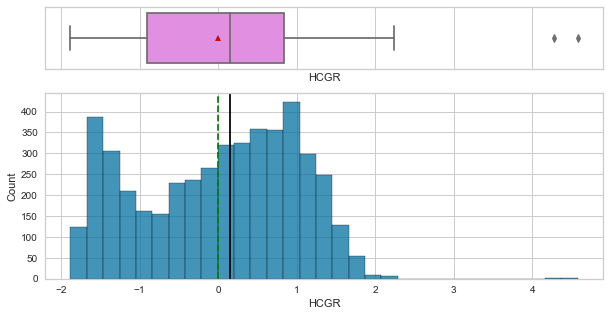

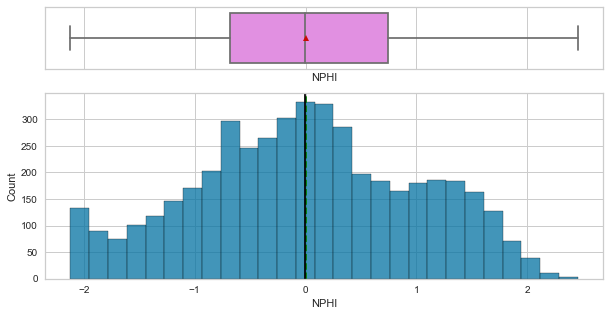

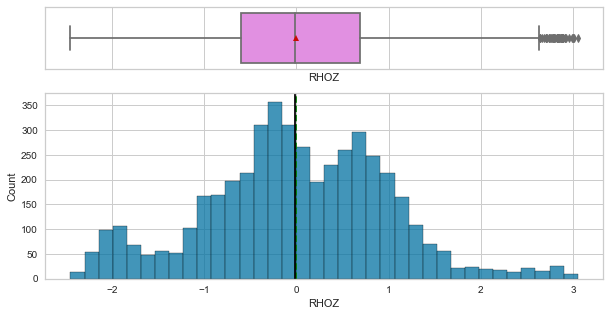

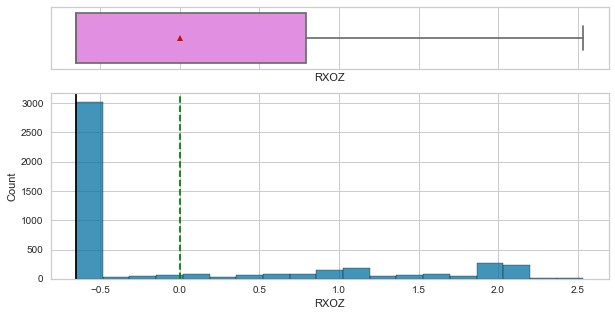

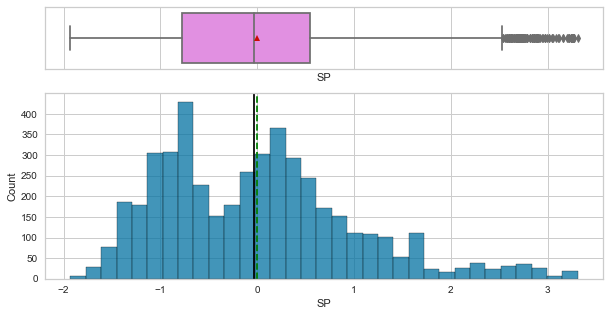

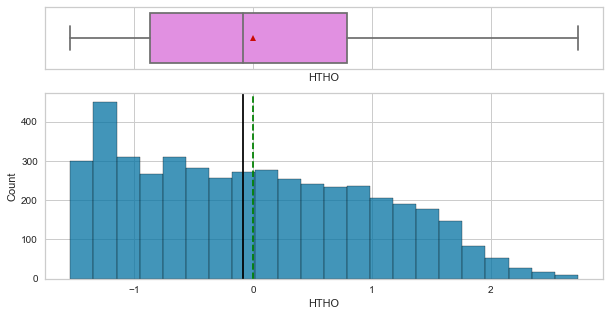

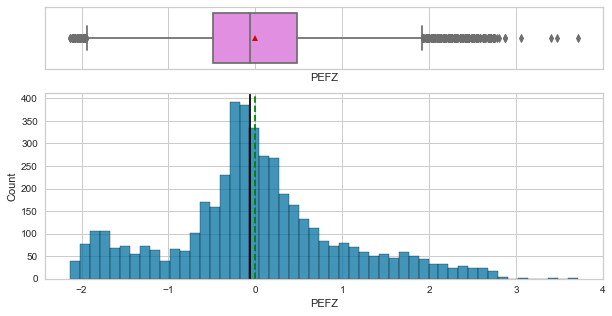

In [118]:
for feature in df1_std.columns:
    histogram_boxplot(df1_std, feature, figsize=(10, 5), kde=False, bins=None)

In [119]:
df1_std.describe().T

count          mean       std       min       25%       50%       75%  \
HCGR  4601.0  1.855902e-16  1.000109 -1.880564 -0.902183  0.144689  0.839543   
NPHI  4601.0  8.465782e-16  1.000109 -2.121536 -0.682141 -0.003046  0.742084   
RHOZ  4601.0 -2.804489e-15  1.000109 -2.449797 -0.604567 -0.013108  0.691838   
RXOZ  4601.0 -1.466141e-16  1.000109 -0.652075 -0.651138 -0.650651  0.789747   
SP    4601.0  1.476071e-15  1.000109 -1.929152 -0.781389 -0.034524  0.546370   
HTHO  4601.0  1.783210e-17  1.000109 -1.534547 -0.862399 -0.083690  0.789284   
PEFZ  4601.0 -4.812012e-16  1.000109 -2.128518 -0.490300 -0.056242  0.475829   

           max  
HCGR  4.577442  
NPHI  2.456330  
RHOZ  3.049867  
RXOZ  2.534974  
SP    3.311755  
HTHO  2.729908  
PEFZ  3.710260

In [120]:
# to compute distances
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

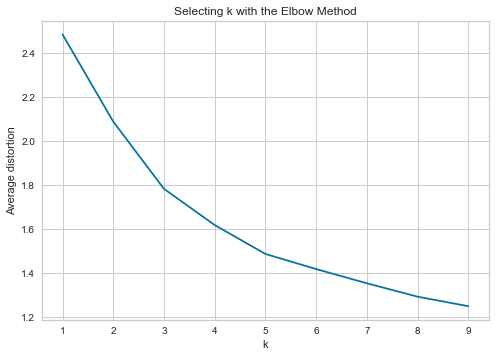

In [121]:
#Finding optimal no. of clusters

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df1_std)
    prediction=model.predict(df1_std)
    meanDistortions.append(sum(np.min(cdist(df1_std, model.cluster_centers_, 'euclidean'), axis=1)) / df1_std.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [122]:
 pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [123]:
from yellowbrick.cluster import KElbowVisualizer

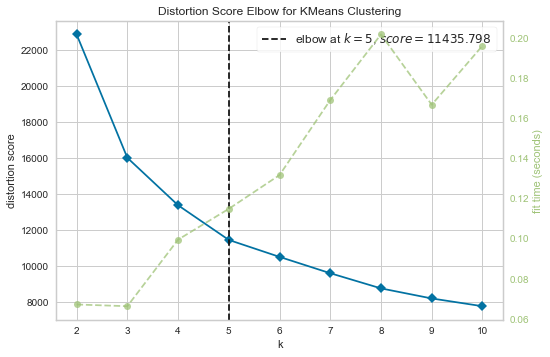

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
# Using the elbow method to find the optimal number of clusters'
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df1_std)
Elbow_M.show()

For n_clusters = 2, silhouette score is 0.27263199921590214
For n_clusters = 3, silhouette score is 0.3412021394977683
For n_clusters = 4, silhouette score is 0.2698887805012248
For n_clusters = 5, silhouette score is 0.28744103433445456
For n_clusters = 6, silhouette score is 0.28646201152196904
For n_clusters = 7, silhouette score is 0.28583892409133227
For n_clusters = 8, silhouette score is 0.2853914223515594
For n_clusters = 9, silhouette score is 0.2760820159347093


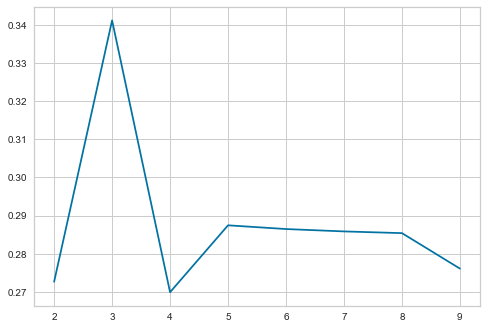

In [125]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df1_std))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df1_std, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

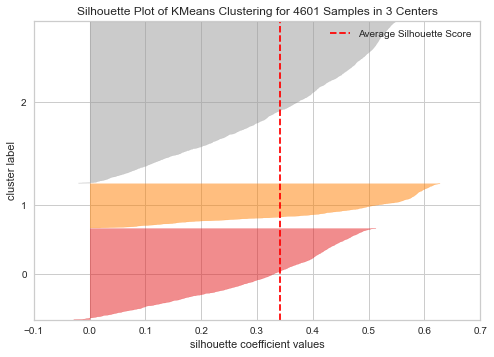

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4601 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [126]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df1_std)
visualizer.show()

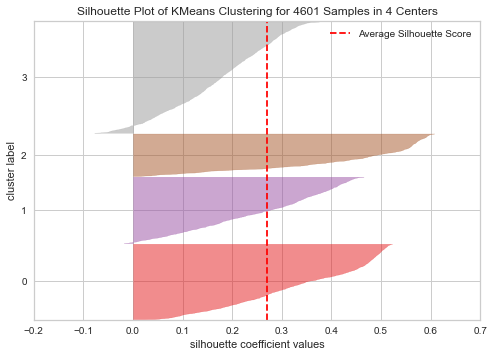

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4601 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [127]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df1_std)
visualizer.show()

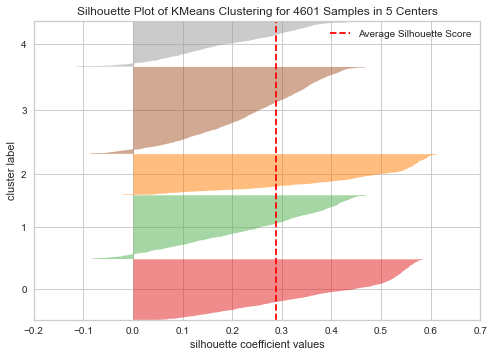

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4601 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [128]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(df1_std)
visualizer.show()

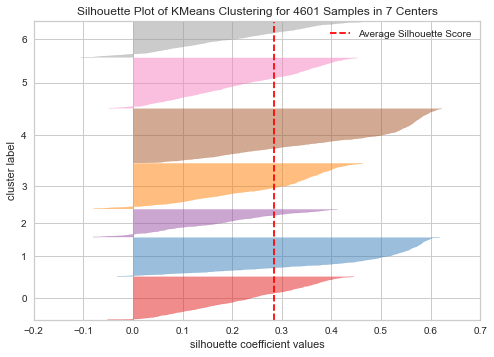

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4601 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [129]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(df1_std)
visualizer.show()

In [130]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1_std)

KMeans(n_clusters=3, random_state=0)

In [131]:
# adding kmeans cluster labels to the original dataframe
dfk3=df1.copy()
dfk3["K_means_segments"] = kmeans.labels_

In [132]:
dfk3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4601 entries, 4000.0 to 6300.0
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HCGR              4601 non-null   float64
 1   NPHI              4601 non-null   float64
 2   RHOZ              4601 non-null   float64
 3   RXOZ              4601 non-null   float64
 4   SP                4601 non-null   float64
 5   HTHO              4601 non-null   float64
 6   PEFZ              4601 non-null   float64
 7   K_means_segments  4601 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 305.5 KB


In [133]:
# selecting numerical columns for future analyses
num_col = df1.select_dtypes(include=np.number).columns.tolist()

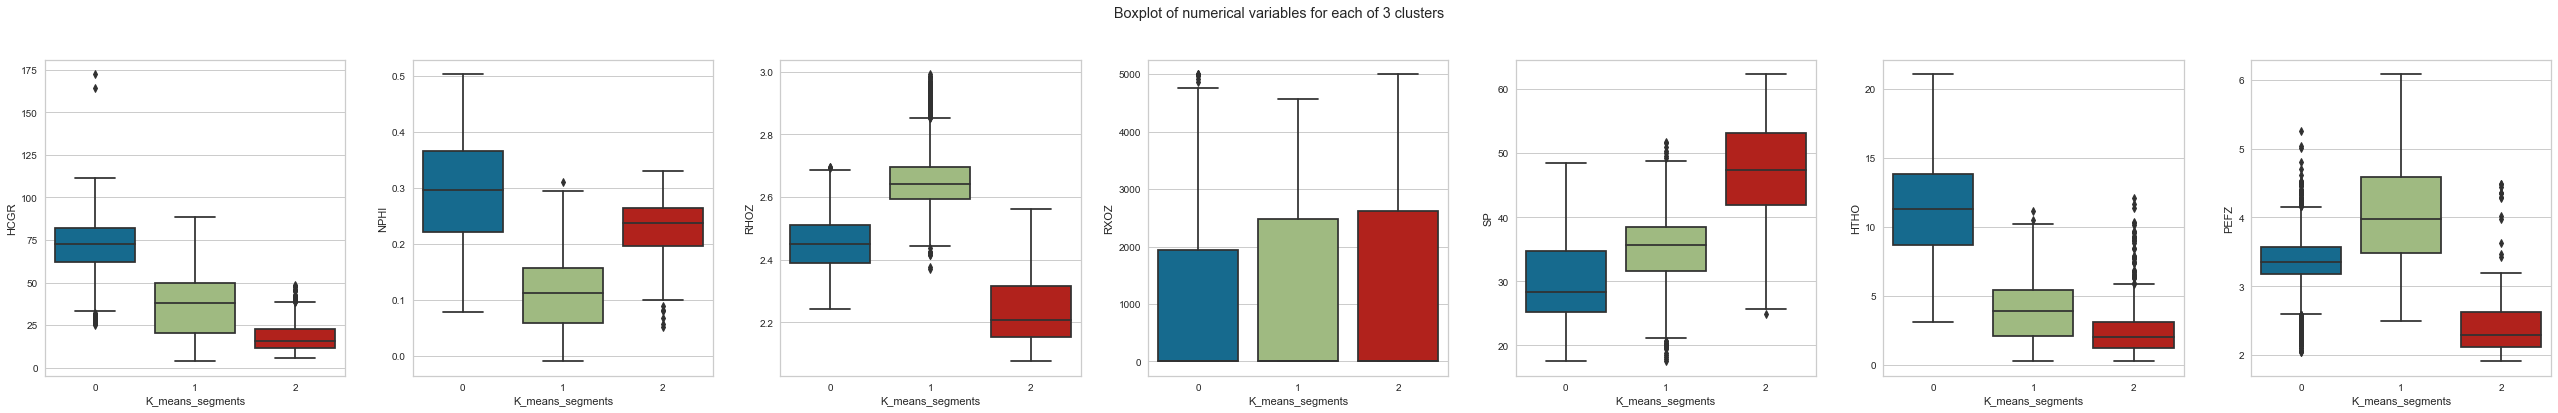

In [135]:
fig, axes = plt.subplots(1, 7, figsize=(36, 6))
fig.suptitle("Boxplot of numerical variables for each of 3 clusters")
counter = 0
for ii in range(7):
    sns.boxplot(ax=axes[ii], y=dfk3[num_col[counter]], x=dfk3["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [136]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df1_std)

KMeans(n_clusters=5, random_state=0)

In [137]:
# adding kmeans cluster labels to the original dataframe
dfk5=df1.copy()
dfk5["K_means_segments"] = kmeans.labels_

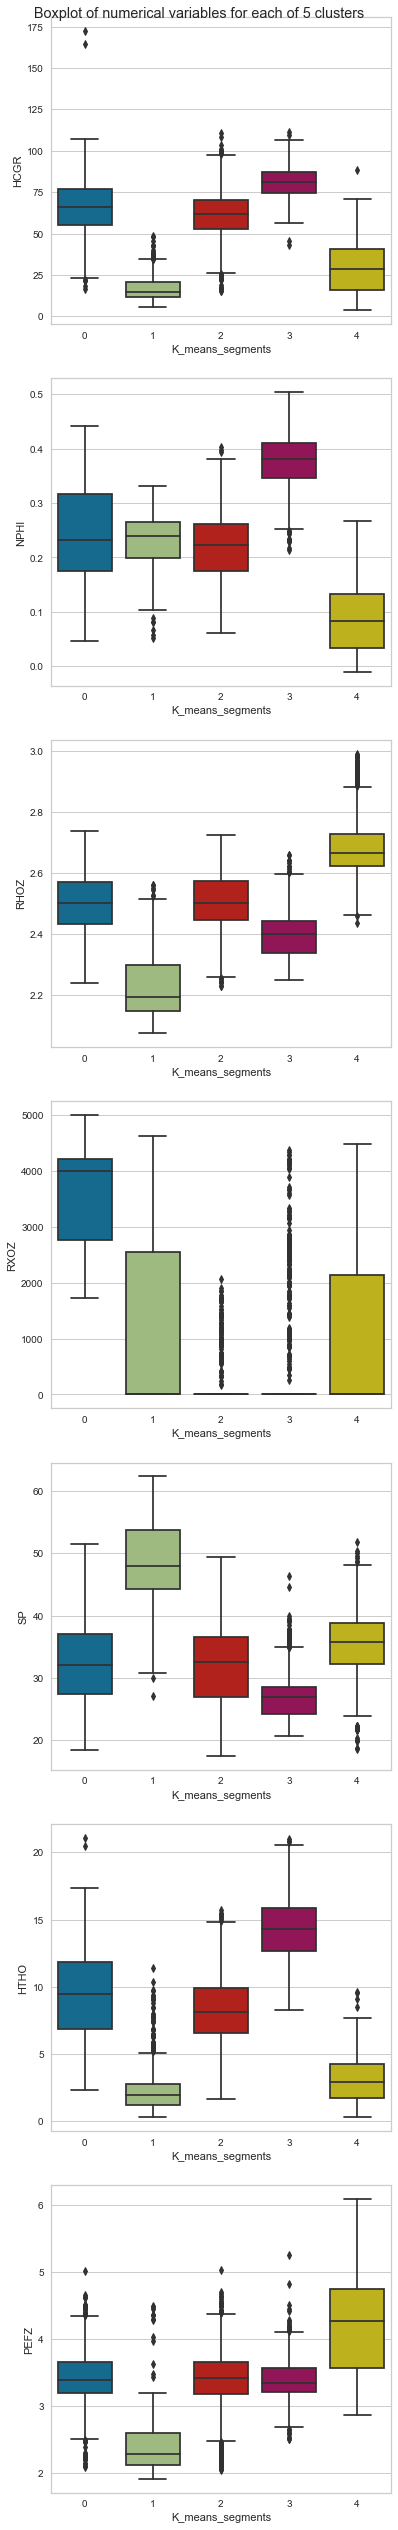

In [138]:
fig, axes = plt.subplots(7, 1, figsize=(6, 36))
fig.suptitle("Boxplot of numerical variables for each of 5 clusters")
counter = 0
for ii in range(7):
    sns.boxplot(ax=axes[ii], y=dfk5[num_col[counter]], x=dfk5["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Hierarchical Clusteriing

In [139]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df1_std, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df1_std))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.23298950414331854.
Cophenetic correlation for Euclidean distance and complete linkage is 0.5221081956316111.
Cophenetic correlation for Euclidean distance and average linkage is 0.7090335060807849.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.5926175925377186.
Cophenetic correlation for Chebyshev distance and single linkage is 0.2830243978183813.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6031382227262813.
Cophenetic correlation for Chebyshev distance and average linkage is 0.6810418369135753.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.48586713156337463.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.16435922416384216.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.12661725033509488.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.4936112720811689.
Copheneti

In [140]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7090335060807849, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [141]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df1_std, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df1_std))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.23298950414331854.
Cophenetic correlation for complete linkage is 0.5221081956316111.
Cophenetic correlation for average linkage is 0.7090335060807849.
Cophenetic correlation for centroid linkage is 0.6855003876527855.
Cophenetic correlation for ward linkage is 0.6003000862341927.
Cophenetic correlation for weighted linkage is 0.5926175925377186.


In [142]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7090335060807849, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and centroid linkage.**

**Let's see the dendrograms for the different linkage methods.**

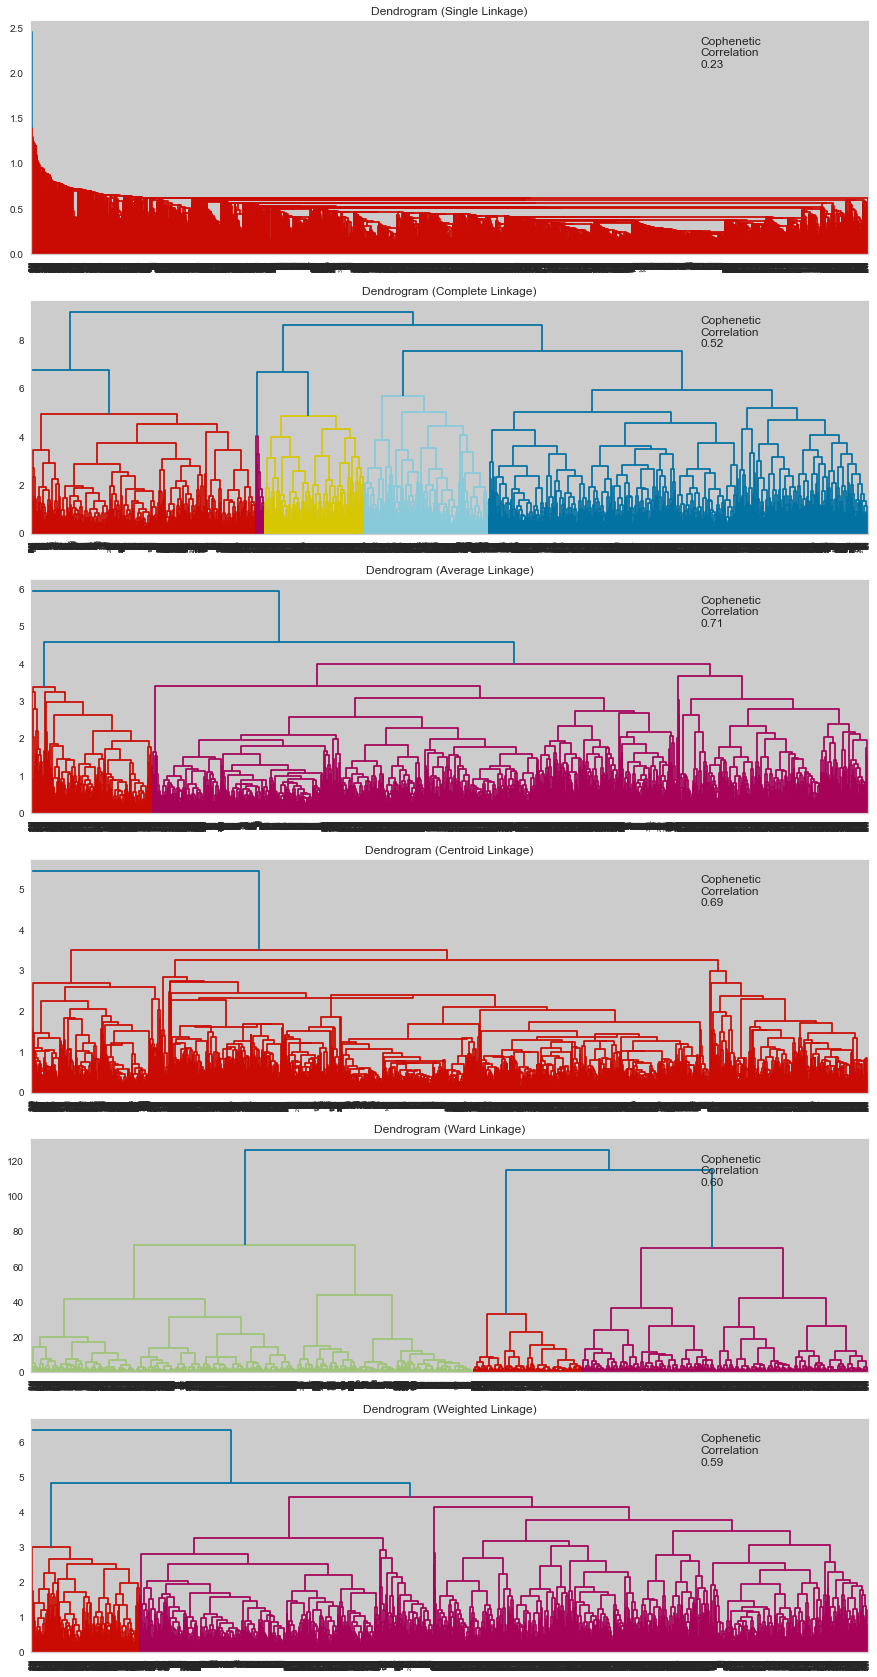

In [143]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df1_std, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df1_std))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",)

In [151]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(df1_std)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [152]:
df_H=df1.copy()
df_H["HC_Clusters"] = HCmodel.labels_

In [153]:
df_H.head()

HCGR    NPHI    RHOZ    RXOZ     SP   HTHO  PEFZ  HC_Clusters
MD                                                                    
4000.0  87.08  0.4042  2.3799  2.2924  22.72  15.86  3.35            0
4000.5  87.46  0.4125  2.3768  2.2924  22.68  15.74  3.35            0
4001.0  87.41  0.4374  2.3692  1.1471  22.10  15.54  3.33            0
4001.5  89.44  0.4165  2.3633  2.2916  21.95  15.28  3.30            0
4002.0  87.78  0.4389  2.3482  2.2882  22.43  14.71  3.33            0

In [154]:
df_H["HC_Clusters"].value_counts()

0    2883
1    1037
2     667
4      12
3       2
Name: HC_Clusters, dtype: int64

In [155]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(df1_std)

AgglomerativeClustering(n_clusters=5)

In [156]:
df_H["HC_Clusters_W"] = HCmodel.labels_

In [157]:
df_H["HC_Clusters_W"].value_counts()

3    1457
0     976
1     827
4     748
2     593
Name: HC_Clusters_W, dtype: int64

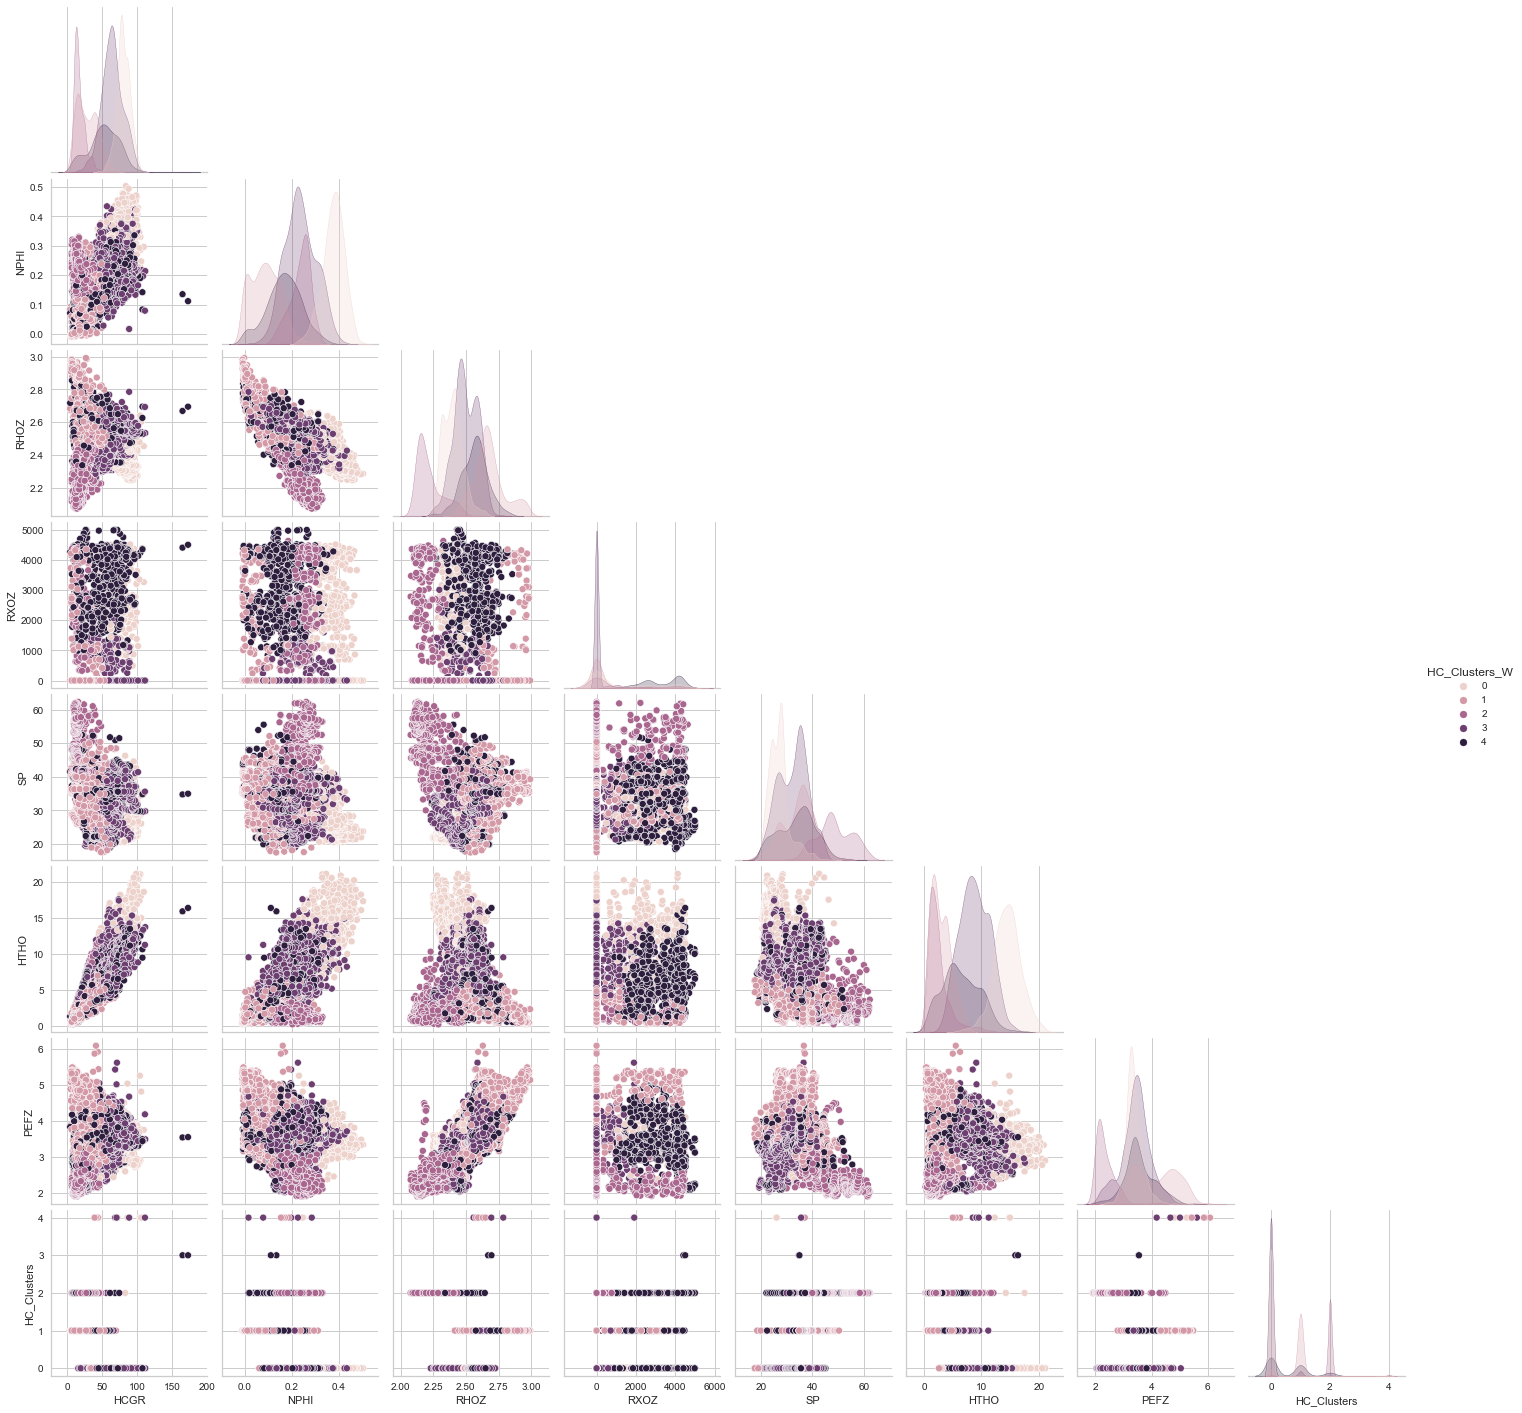

In [158]:
sns.pairplot(df_H, hue='HC_Clusters_W',  corner=True, diag_kind='kde')

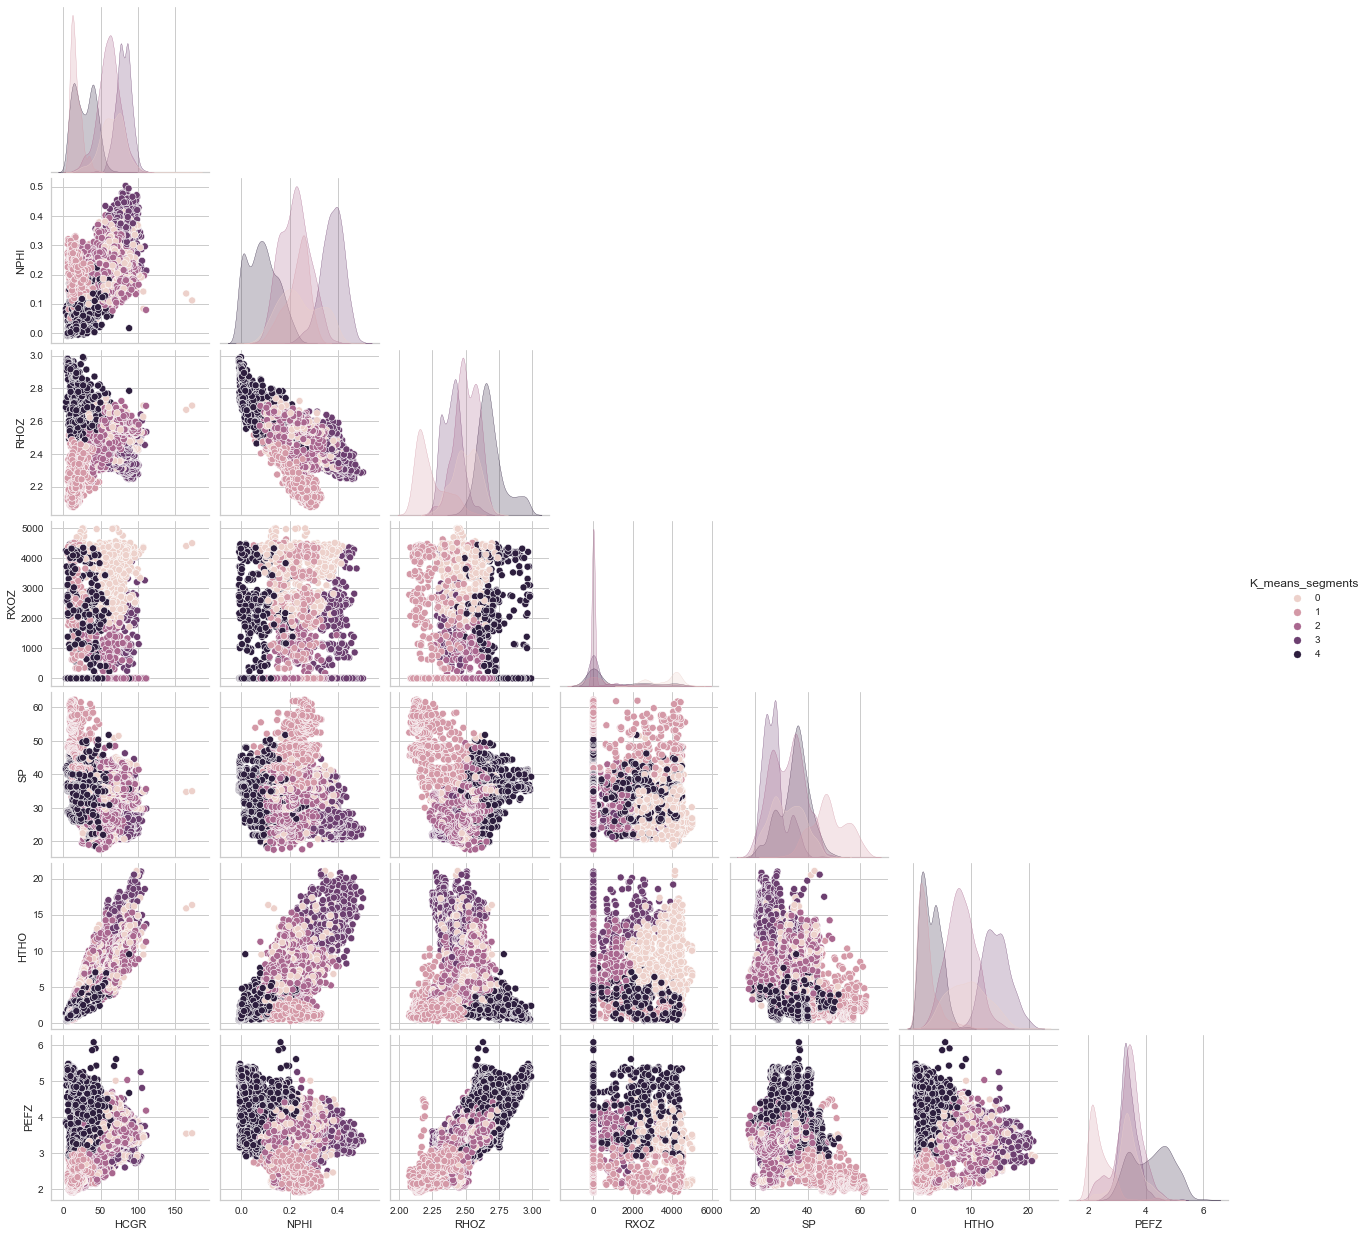

In [159]:
sns.pairplot(dfk5, hue="K_means_segments",  corner=True, diag_kind='kde')

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(dfk5["math score"], dfk5["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,3,2)
plt.scatter(student_df["math score"], student_df["writing score"])
plt.title("math score vs writing score")

plt.subplot(1,3,3)
plt.scatter(student_df["reading score"], student_df["writing score"])
plt.title("reading score vs writing score")

plt.show()

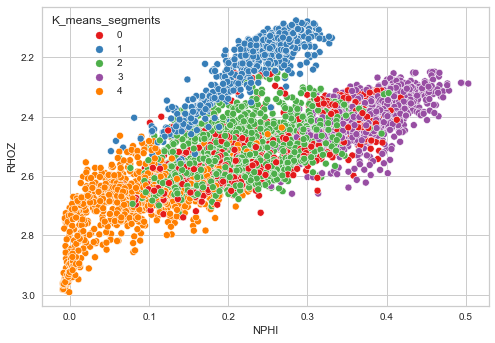

In [167]:
ax=sns.scatterplot(x='NPHI', y='RHOZ', data=dfk5, hue='K_means_segments', palette='Set1')

plt.gca().invert_yaxis()

## 2. Apply UMAP to the data.

In [144]:
import umap
import time

In [145]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df1_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 4.625698566436768 seconds


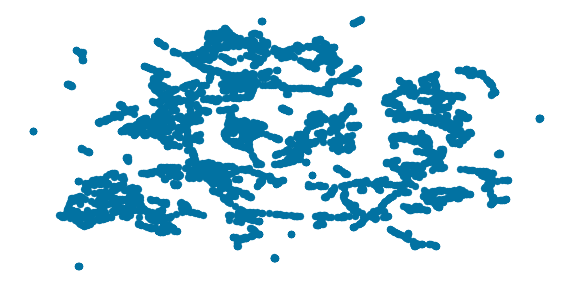

In [146]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

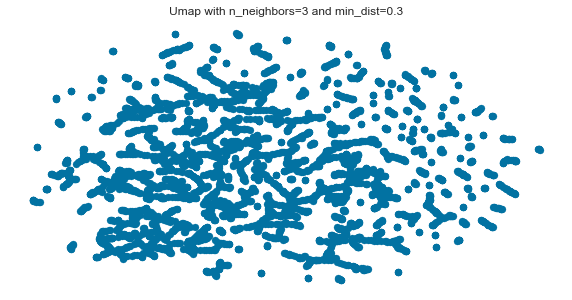

In [147]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df1_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=0.3")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

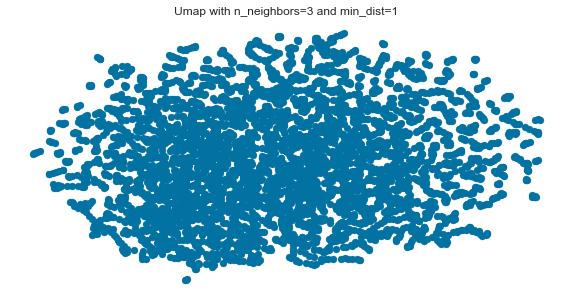

In [148]:
umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=1,
                      metric='correlation').fit_transform(df1_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=3 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

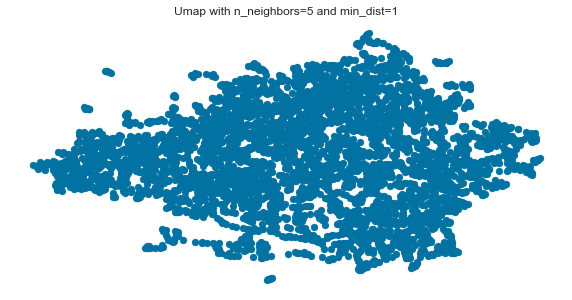

In [150]:
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=1,
                      metric='correlation').fit_transform(df1_std)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=5 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()